# La réforme des retraites ne se fera pas à «budget constant»

Référence : 
* https://blogs.mediapart.fr/justin-b/blog/270120/objectif-13-non-la-reforme-des-retraites-ne-se-fera-pas-budget-constant, par Par Justin Benard (collectif Nos retraites) et Michaël Zemmour.
* *Projet de loi instituant un système universel de retraite.* - Etude d'impact, 24 janvier 2020

"Contrairement au discours du gouvernement, la réforme des retraites ne se ferait pas à trajectoire budgétaire constante. Elle vise en effet à réduire les dépenses de retraite à moins de 13 % du PIB en 2050, soit une baisse de 0,3 à 0,5 points de PIB par rapport à la trajectoire actuelle. Ce que l'étude d'impact s'emploie à masquer en déployant des trésors de créativité comptable…"

Le tableau 39 suivant est présenté dans l'étude d'impact page 176. 

![Tableau 39](../Figures-Etude-Impact/EtudeImpact-Tableau-39-Depenses-SUR.png)

In [1]:
from retraites.SimulateurRetraites import SimulateurRetraites
from retraites.EtudeImpact import EtudeImpact
import pylab as pl
from scipy import interpolate
import numpy as np

In [2]:
simulateur = SimulateurRetraites()

In [3]:
analyse_COR = simulateur.pilotageCOR()

In [4]:
etudeImpact = EtudeImpact(simulateur)
analyse_etudeImpact = etudeImpact.calcule()

In [5]:
annees_EI = [2025, 2030, 2040, 2050]
nb_annees = len(annees_EI)

In [6]:
scenario_central = simulateur.scenario_central # Scénario central : Hausse = +1.3% PIB

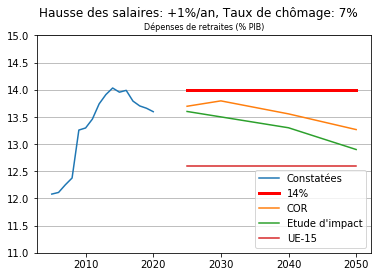

In [7]:
pl.grid(axis="y")
pl.suptitle(simulateur.scenarios_labels[scenario_central]);
scenarios = [scenario_central] # Scénario central : Hausse = +1.3% PIB
annees_constatees = range(analyse_etudeImpact.annees[0], 2021)
# 1. Constatées
analyse_etudeImpact.graphique("Depenses", dessine_legende= False, \
                              scenarios_indices = scenarios, dessine_annees = annees_constatees)
# 2. 14 %
pl.plot(annees_EI, [14.0]*nb_annees, "r-", linewidth = 3)
# 3. COR
analyse_COR.graphique("Depenses", dessine_legende= False, \
                      scenarios_indices = scenarios, dessine_annees = annees_EI)
# 4. Etude d'impact
analyse_etudeImpact.graphique("Depenses", dessine_legende= False, \
                              scenarios_indices = scenarios, dessine_annees = annees_EI)
# 5. UE-15
pl.plot(annees_EI, [12.6]*nb_annees)
pl.legend(["Constatées", "14%", "COR", "Etude d'impact", "UE-15"]);